# Data Mining Project

## Model Evaluation Pipeline

In order to evaluate a model's performance with a certain data we have to define and structure a pipeline that collects information about the the model's performance metrics and a way to test the model with unknown data.


Dicas para avaliação de modelos:
Problema cronológico -> Usar apenas dados passados para prever os futuros
Problema da Granularidade -> usar dados passados para prever o proximo ano progressivamente (ex: treino:6 anos teste:7ºano -> treino:7 anos teste:8ºano)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

DATA_PATH = 'data'
DATA_TEAMS = 'teams.csv'
DATA_COACHES = 'coaches.csv'
DATA_PLAYERS = 'players.csv'
DATA_AWARDS = 'awards_players.csv'
DATA_PLAYERS_TEAMS = 'players_teams.csv'
DATA_SERIES_POST = 'series_post.csv'
DATA_TEAMS_POST = 'teams_post.csv'

In [2]:
# Merge Tables

# Read the CSV files into data frames
awards_df = pd.read_csv(f'{DATA_PATH}/{DATA_AWARDS}')
coaches_df = pd.read_csv(f'{DATA_PATH}/{DATA_COACHES}')
players_df = pd.read_csv(f'{DATA_PATH}/{DATA_PLAYERS}')
players_teams_df = pd.read_csv(f'{DATA_PATH}/{DATA_PLAYERS_TEAMS}')
series_post_df = pd.read_csv(f'{DATA_PATH}/{DATA_SERIES_POST}')
teams_post_df = pd.read_csv(f'{DATA_PATH}/{DATA_TEAMS_POST}')
teams_df = pd.read_csv(f'{DATA_PATH}/{DATA_TEAMS}')

# Merge Players_Teams and Players using the "playerID" key
merged_df = pd.merge(teams_df, players_teams_df, on=['year', 'tmID', 'lgID'])

# Merge Awards and Players using the "playerID" key
merged_df = pd.merge(merged_df, awards_df, on=['playerID', 'year', 'lgID'], how='inner')

# Merge Coaches and Teams using the combination of "year," "tmID," and "lgID" keys
merged_df = pd.merge(merged_df, coaches_df, on=['year', 'tmID', 'lgID'], how='inner')

# Merge Series_post and Teams twice (for winning and losing teams)
# using "tmIDWinner" and "lgIDWinner" keys for winning teams
winning_teams_df = pd.merge(series_post_df, teams_df, left_on=['year', 'tmIDWinner', 'lgIDWinner'], right_on=['year', 'tmID', 'lgID'], suffixes=('', '_winning'), how='inner')
# using "tmIDLoser" and "lgIDLoser" keys for losing teams
losing_teams_df = pd.merge(series_post_df, teams_df, left_on=['year', 'tmIDLoser', 'lgIDLoser'], right_on=['year', 'tmID', 'lgID'], suffixes=('', '_losing'), how='inner')

# Merge Teams_post and Teams using the combination of "year," "tmID," and "lgID" keys
merged_df = pd.merge(merged_df, teams_post_df, on=['year', 'tmID', 'lgID'], how='inner')

players_df.rename(columns={"bioID": "playerID"}, inplace=True)
merged_df = pd.merge(merged_df, players_df, on=['playerID'], how='inner')

# You now have a consolidated DataFrame with all the merged data
# You can continue to perform any additional analysis or transformations needed

# Save the result to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)

print(merged_df.head())

   year  lgID tmID franchID confID  divID  rank playoff  seeded firstRound  \
0    10  WNBA  ATL      ATL     EA    NaN     2       Y       0          L   
1     1  WNBA  CLE      CLE     EA    NaN     2       Y       0          W   
2     5  WNBA  CON      CON     EA    NaN     1       Y       0          W   
3     6  WNBA  CON      CON     EA    NaN     1       Y       0          W   
4     7  WNBA  CON      CON     EA    NaN     1       Y       0          W   

   ...  L  pos firstseason  lastseason  height  weight      college  \
0  ...  2    F           0           0    73.0     160   Louisville   
1  ...  3    G           0           0    65.0     125   Penn State   
2  ...  3    F           0           0    74.0     165     Virginia   
3  ...  3  F-C           0           0    74.0     188  St. Edwards   
4  ...  2  G-F           0           0    72.0     167       Purdue   

   collegeOther   birthDate   deathDate  
0           NaN  1986-09-10  0000-00-00  
1           NaN  196

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_17796\3152430755.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


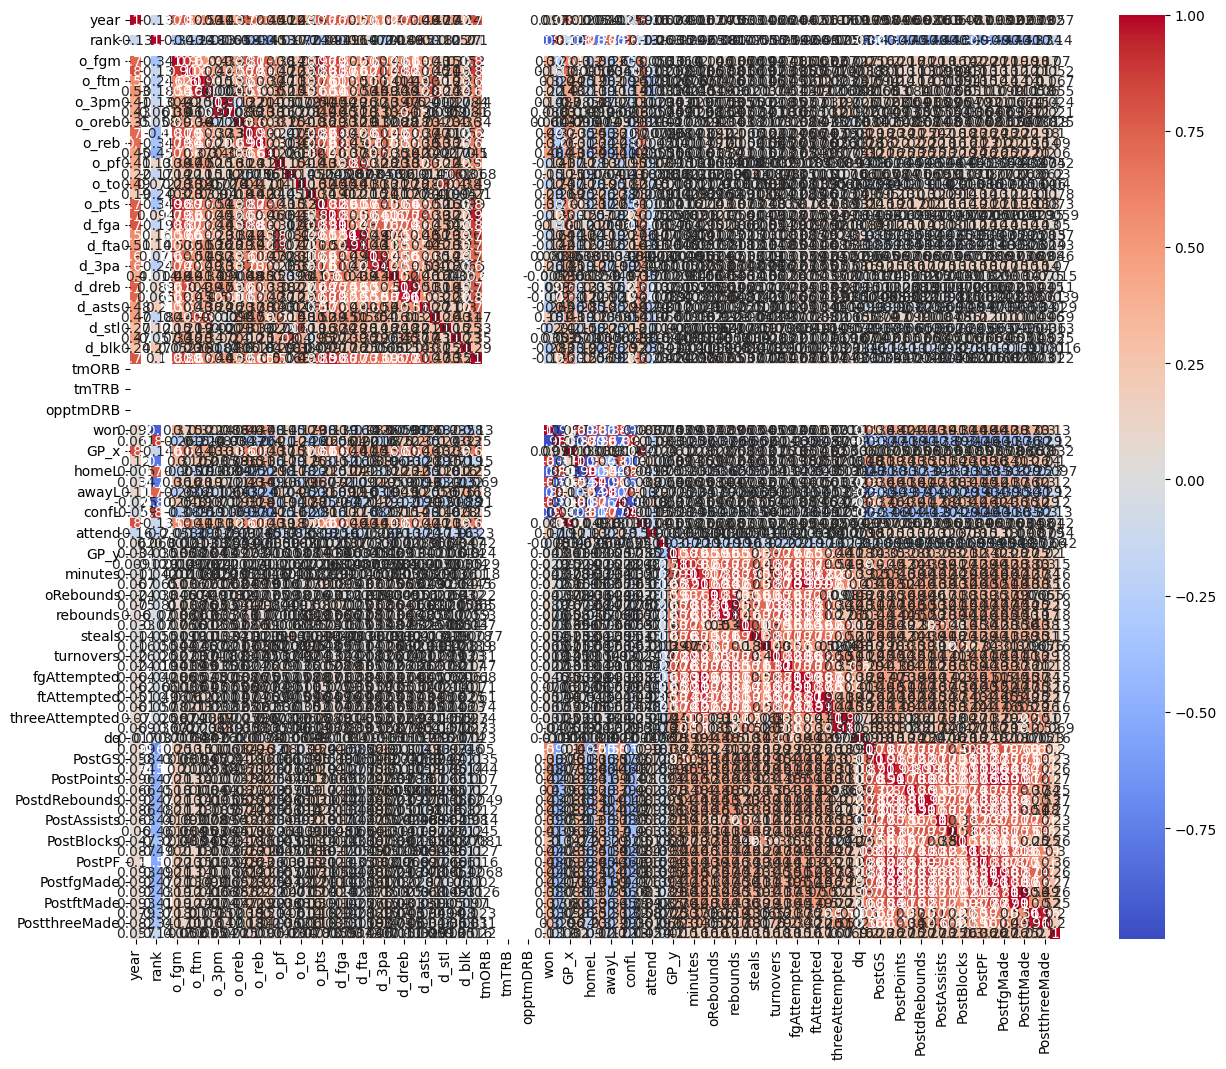

In [5]:
# Merge Players_Teams and Players using the "playerID" key
df = pd.merge(teams_df, players_teams_df, on=['year', 'tmID', 'lgID'])
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
# Merge Players_Teams and Players using the "playerID" key
df = pd.merge(teams_df, coaches_df, on=['year', 'tmID', 'lgID'])
%matplotlib inline
sb.pairplot(df, hue ='playoff')

KeyboardInterrupt: 